<a href="https://colab.research.google.com/github/Matrixmax/Dive_into_DeepLearning/blob/main/0x42_%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E5%92%8C%E9%9A%8F%E6%9C%BA%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在本节中，我们将介绍梯度下降（gradient descent）的工作原理。虽然梯度下降在深度学习中很少被直接使用，但理解梯度的意义以及沿着梯度反方向更新自变量可能降低目标函数值的原因是学习后续优化算法的基础。随后，我们将引出随机梯度下降（stochastic gradient descent）。



## 1.一维梯度下降
我们先以简单的一维梯度下降为例，解释梯度下降算法可能降低目标函数值的原因。假设连续可导的函数f:R→R的输入和输出都是标量。给定绝对值足够小的数ϵ，根据泰勒展开公式，我们得到以下的近似：

$ f(x+\epsilon) \approx f(x)+\epsilon f^{\prime}(x) $
这里f′(x)是函数f在x处的梯度。一维函数的梯度是一个标量，也称导数。接下来，找到一个常数η>0，使得∣ηf′(x)∣足够小，那么可以将ϵ替换为−ηf′(x)并得到

$f\left(x-\eta f^{\prime}(x)\right) \approx f(x)-\eta f^{\prime}(x)^{2}$

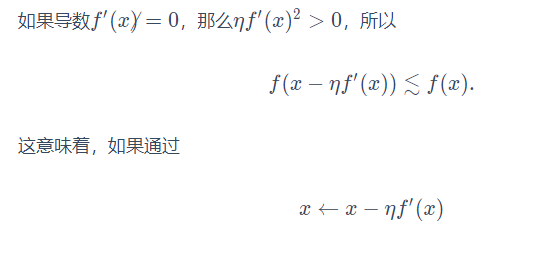



来迭代x，函数f(x)的值可能会降低。因此在梯度下降中，我们先选取一个初始值x和常数η>0，然后不断通过上式来迭代x，直到达到停止条件，例如f′(x)2的值已足够小或迭代次数已达到某个值。

下面我们以目标函数f(x)=x2为例来看一看梯度下降是如何工作的。虽然我们知道最小化f(x)的解为x=0，这里依然使用这个简单函数来观察x是如何被迭代的。首先，导入本节实验所需的包或模块。

In [ ]:
%matplotlib inline

import time
import torch
from torch import nn,optim
import torch.nn.functional as F
import math
import numpy as np
import sys
from google.colab import drive

drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dive_Into_Deep_Learning/')
import d2lzh_pytorch as d2l

import d2lzh_pytorch as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np


Mounted at /content/drive


接下来使用x=10作为初始值，并设η=0.2。使用梯度下降对x迭代10次，可见最终x的值较接近最优解。

In [ ]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta *2*x  # f(x) = x * x的导数为f'(x) = 2 * x
        results.append(x)
    print('epoch 10,x:',x)
    return results

res = gd(0.2)

epoch 10,x: 0.06046617599999997


下面将绘制出自变量xx的迭代轨迹。

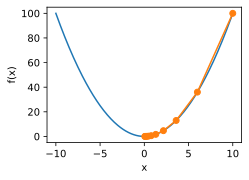

In [ ]:
def show_trace(res):
    n = max(abs(min(res)),abs(max(res)),10)
    f_line = np.arange(-n,n,0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

## 2.学习率
上述梯度下降算法中的正数ηη通常叫作学习率。这是一个超参数，需要人工设定。如果使用过小的学习率，会导致xx更新缓慢从而需要更多的迭代才能得到较好的解。

下面展示使用学习率η=0.05时自变量xx的迭代轨迹。可见，同样迭代10次后，当学习率过小时，最终xx的值依然与最优解存在较大偏差。

epoch 10,x: 3.4867844009999995


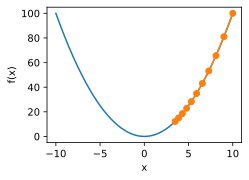

In [ ]:
show_trace(gd(0.05))

如果使用过大的学习率，∣ηf′(x)∣可能会过大从而使前面提到的一阶泰勒展开公式不再成立：这时我们无法保证迭代x会降低f(x)的值。

举个例子，当设学习率η=1.1时，可以看到x不断越过（overshoot）最优解x=0并逐渐发散。

epoch 10,x: 61.917364224000096


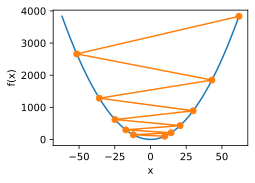

In [ ]:
show_trace(gd(1.1))


### 3.多维梯度下降
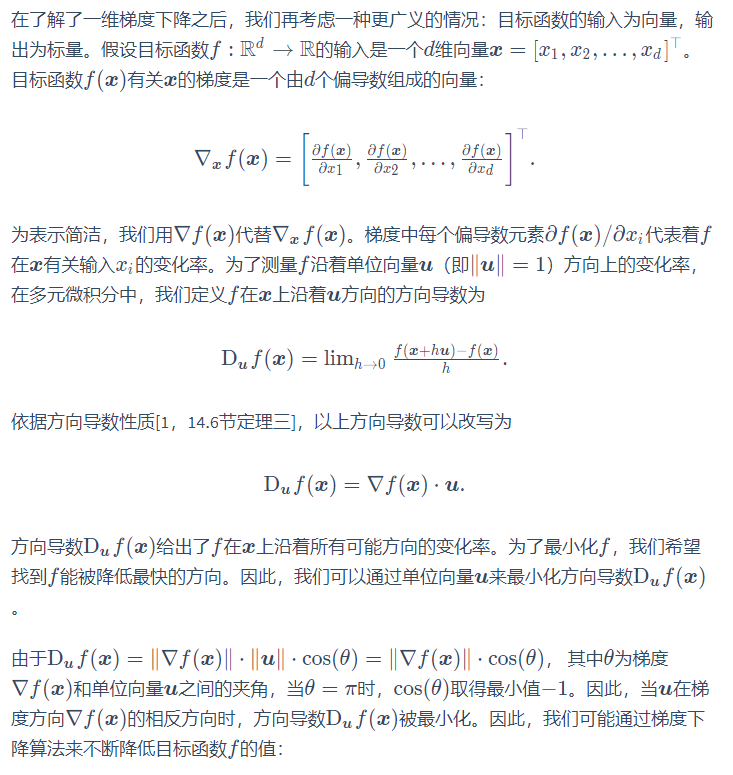

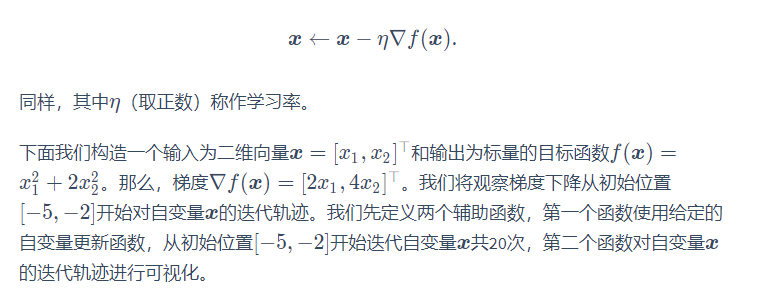

In [ ]:
def train_2d(trainer):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')


然后，观察学习率为0.10.1时自变量的迭代轨迹。使用梯度下降对自变量xx迭代20次后，可见最终xx的值较接近最优解[0,0][0,0]。

epoch 20, x1 -0.057646, x2 -0.000073


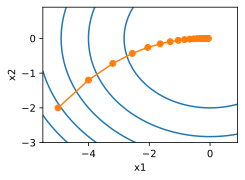

In [ ]:
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))


## 4.随机梯度下降
在深度学习里，目标函数通常是训练数据集中有关各个样本的损失函数的平均。设fi(x)是有关索引为i的训练数据样本的损失函数，n是训练数据样本数，x是模型的参数向量，那么目标函数定义为

$f(\boldsymbol{x})=\frac{1}{n} \sum_{i=1}^{n} f_{i}(\boldsymbol{x})$

目标函数在x处的梯度计算为

$\nabla f(\boldsymbol{x})=\frac{1}{n} \sum_{i=1}^{n} \nabla f_{i}(\boldsymbol{x})$

如果使用梯度下降，每次自变量迭代的计算开销为O(n)，它随着n线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。随机梯度下降（stochastic gradient descent，SGD）减少了每次迭代的计算开销。在随机梯度下降的每次迭代中，我们随机均匀采样的一个样本索引i∈{1,…,n}i∈{1,…,n}，并计算梯度∇fi(x)来迭代x:

这里η同样是学习率。可以看到每次迭代的计算开销从梯度下降的O(n)降到了常数O(1)。值得强调的是，随机梯度∇fi(x)是对梯度∇f(x)的无偏估计：

E_{i} \nabla f_{i}(\boldsymbol{x})=\frac{1}{n} \sum_{i=1}^{n} \nabla f_{i}(\boldsymbol{x})=\nabla f(\boldsymbol{x})


这意味着，平均来说，随机梯度是对梯度的一个良好的估计。

下面我们通过在梯度中添加均值为0的随机噪声来模拟随机梯度下降，以此来比较它与梯度下降的区别。

epoch 20, x1 -0.013249, x2 -0.025440


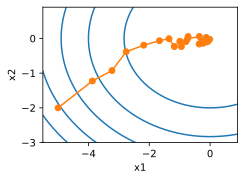

In [8]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))

可以看到，随机梯度下降中自变量的迭代轨迹相对于梯度下降中的来说更为曲折。这是由于实验所添加的噪声使模拟的随机梯度的准确度下降。在实际中，这些噪声通常指训练数据集中的无意义的干扰。